## Task-C: Regression outlier effect.

<font face='georgia'> <h3> Objective:Visualization best fit linear regression line for different scenarios</h3> </font>

In [1]:
# you should not import any other packages
import warnings
warnings.filterwarnings("ignore")

import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import SGDRegressor

In [2]:
import scipy as sp
import scipy.optimize

def angles_in_ellipse(num, a, b):
    assert(num > 0)
    assert(a < b)
    angles = 2 * np.pi * np.arange(num) / num
    if a != b:
        e = (1.0 - a ** 2.0 / b ** 2.0) ** 0.5
        tot_size = sp.special.ellipeinc(2.0 * np.pi, e)
        arc_size = tot_size / num
        arcs = np.arange(num) * arc_size
        res = sp.optimize.root(
            lambda x: (sp.special.ellipeinc(x, e) - arcs), angles)
        angles = res.x 
    return angles

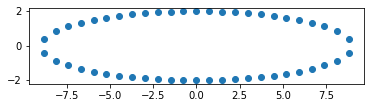

In [3]:
a = 2
b = 9
n = 50

phi = angles_in_ellipse(n, a, b)
e = (1.0 - a ** 2.0 / b ** 2.0) ** 0.5
arcs = sp.special.ellipeinc(phi, e)

fig = plt.figure()
ax = fig.gca()
ax.axes.set_aspect('equal')
ax.scatter(b * np.sin(phi), a * np.cos(phi))
plt.show()

In [4]:
X = b * np.sin(phi)
Y = a * np.cos(phi)

<pre>
<font face='georgia'>
<i>
1. As a part of this assignment you will be working the regression problem and how regularization helps to get rid of outliers

2. Use the above created X, Y for this experiment.

3. Either implement your own SGDRegression(prefered) excatly similar to "SGD assignment" with mean sequared error or you can use the SGDRegression of sklearn, for example "SGDRegressor(alpha = 0.001, eta0 = 0.001, learning_rate = 'constant', random_state = 0)". Use constant learning rate and learning rate <b>eta0</b> initialized.

4. Train your linear regression on the data (X, Y) with different regularizations alpha = [0.0001, 1, 100] and observe how prediction hyperplane moves with respect to the outliers.

5. This is the result of one of the experiment we did (title of the plot was not metioned intentionally) in each iteration we were adding single outlier and observed the movement of the hyper plane.
<img src='https://i.imgur.com/FctjBiD.png'> 

6. please consider this list of outliers: [(0,2),(21, 13), (-23, -15), (22,14), (23, 14)] in each of tuple the first elemet is the input feature(X) and the second element is the output(Y)

7. for each regularizer, you need to add these outliers one at time to data and then train your model again on the updated data. 

8. Plot a 3*5 grid of subplots, where each row corresponds to results of model with a single regularizer.

9. Algorithm: 

for each regularizer:
    for each outlier:
        #add the outlier to the data
        #fit the linear regression to the updated data
        #get the hyper plane
        #plot the hyperplane along with the data points

10. MAKE SURE YOU WRITE THE DETAILED OBSERVATIONS, PLEASE CHECK THE LOSS FUNCTION IN THE SKLEARN DOCUMENTATION
 (please do search for it).
</i>
</font>
</pre>

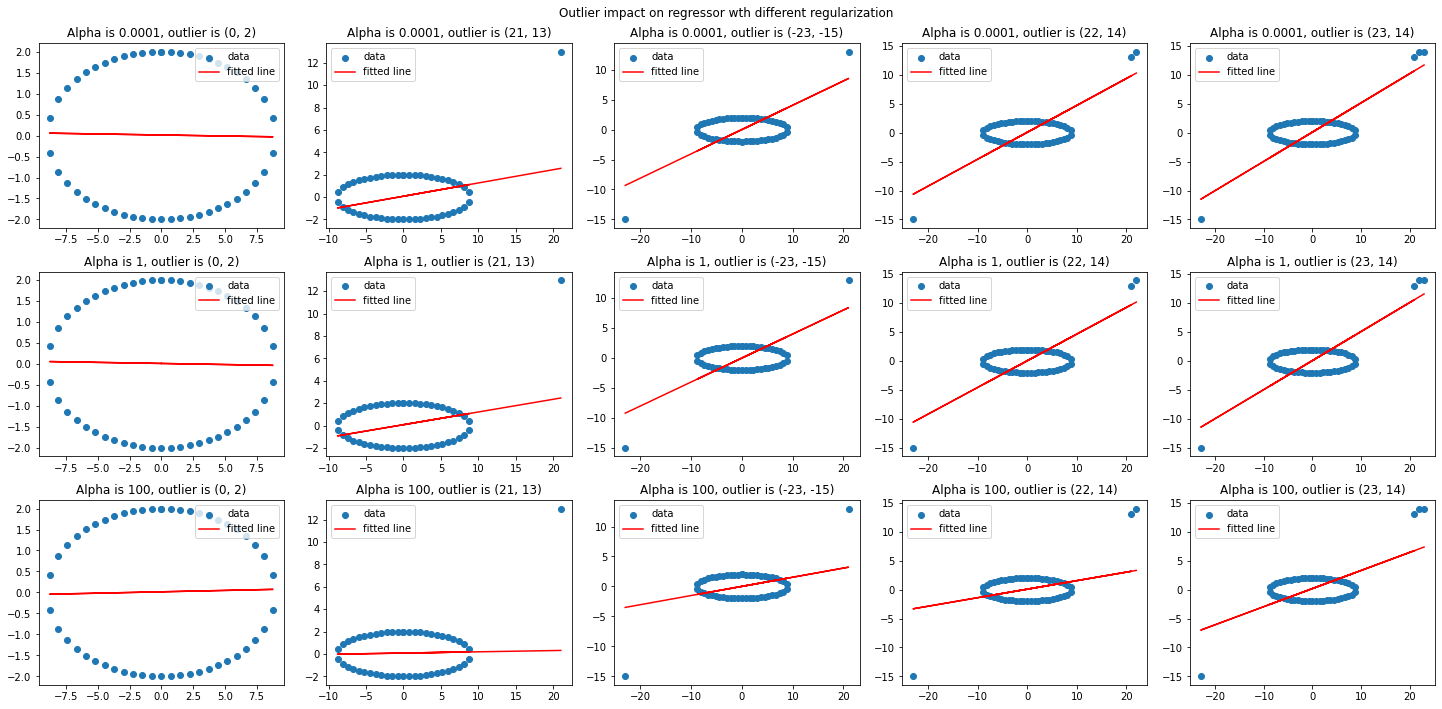

In [5]:
outlier = [(0, 2), (21, 13), (-23, -15), (22, 14), (23, 14)]
regularizer = [0.0001, 1, 100]
plt.figure(figsize = (20, 10))
plot_number = 1
for c in regularizer:
    temp_X = X
    temp_Y = Y
    for j in outlier:
        plt.subplot(len(regularizer), len(outlier), plot_number)
        temp_X = np.append(temp_X, j[0])
        temp_Y = np.append(temp_Y, j[1])
        regressor = SGDRegressor(alpha = c, eta0 = 0.001, learning_rate = 'constant', random_state = 0)
        regressor.fit(temp_X.reshape(-1, 1), temp_Y)
        y_pred = regressor.predict(temp_X.reshape(-1, 1))
        plt.scatter(temp_X, temp_Y, label = 'data')
        plt.plot(temp_X, y_pred, c = 'r', label = 'fitted line')
        plt.title('Alpha is {}, outlier is {}'.format(c, j))
        plt.legend()
        plot_number += 1
plt.suptitle('Outlier impact on regressor wth different regularization')
plt.tight_layout()
plt.show()

#### _Observations_

- With the introduction of outliers, the decision plane is changing.

- When there was no negative outlier point, the decison line intercept was close to -1. With the introduction of negative outlier point the intercept changed to around -10.

- When more positive outliers were introduced, intercept did not change much.

- With higher vaues of regularization, the slope of the line is decreasing for data with outlier point at (21, 13) onward. In other words, the bias is increasing which can be seen by almost flat lines for alpha = 100 with outlier points at (21, 13), (-23, -15) and (22, 14).

##### References: 

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html

https://medium.com/analytics-vidhya/what-is-an-outliers-how-to-detect-and-remove-them-which-algorithm-are-sensitive-towards-outliers-2d501993d59

https://datascience.stackexchange.com/questions/63900/how-regularization-helps-to-get-rid-of-outliers

https://towardsdatascience.com/the-game-of-regularization-91442b3be862

https://medium.com/geekculture/essential-guide-to-handle-outliers-for-your-logistic-regression-model-63c97690a84d#:~:text=Logistic%20Regression%20models%20are%20not,model%20and%20lowering%20the%20performance.

### <ins>_Concept Understanding_</ins>

_As regularization term increases, the effect of outliers is neglected._ 

_For smaller values of `alpha`, regularization strength is small._

_When regularization strength increases, it leads to underfitting with increase in the number of outliers._

_As we increase the value of `alpha`, the hyperplane is not moving significantly, increasing alpha value has very less impact on position of hyperplane._